In [10]:
!pip uninstall -y numpy pandas
!pip install pandas==2.2.2 numpy==1.26.4 matplotlib==3.8.0 seaborn==0.13.2 streamlit==1.40.2 plotly==5.24.1 Pillow==11.0.0 scikit-learn==1.5.2

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2
  Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (19 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached pandas-2.2.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.0 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


Visualized Patient Report


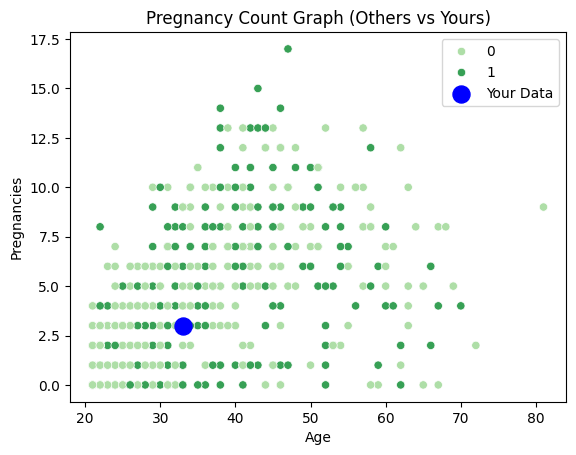

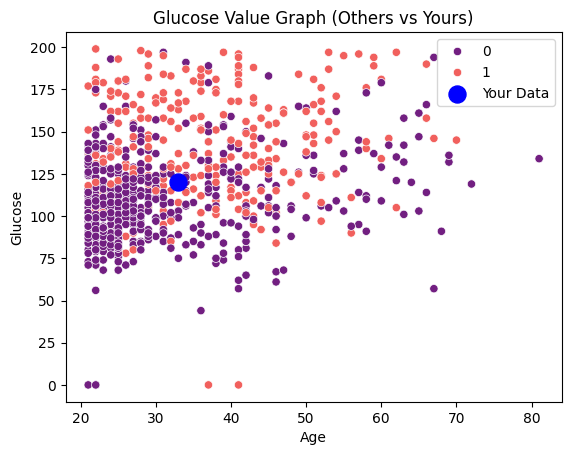

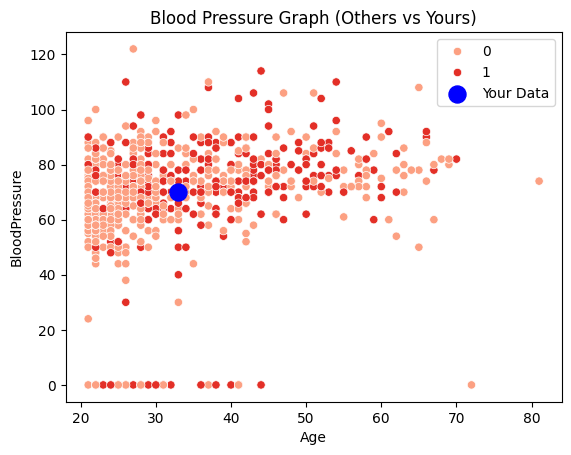

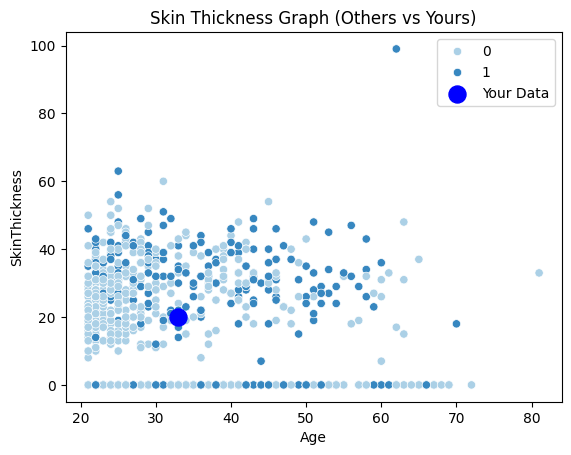

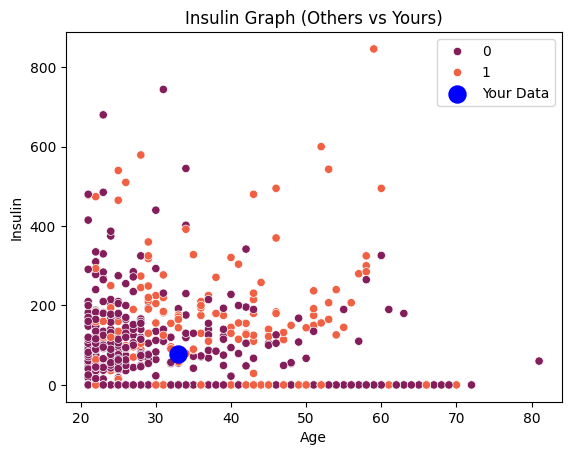

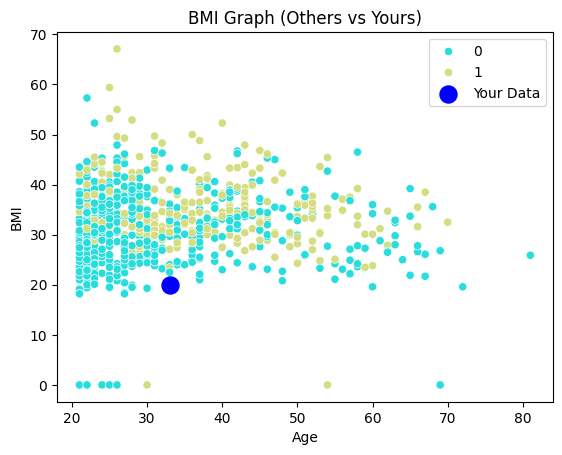

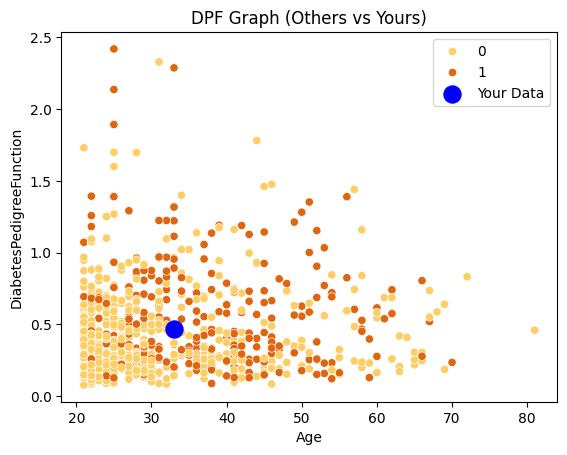

Your Report: You are not Diabetic
Model Accuracy: 78.57%


In [11]:
# IMPORT STATEMENTS
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# LOAD DATA
url = "https://raw.githubusercontent.com/fenago/datasets/main/pima-indians-diabetes2.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=column_names)

# SPLITTING X AND Y DATA
x = df.drop(['Outcome'], axis=1)
y = df['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Function to simulate user input (since Google Colab can't have sidebar sliders)
# Using example user data
user_data = {
    'Pregnancies': 3,
    'Glucose': 120,
    'BloodPressure': 70,
    'SkinThickness': 20,
    'Insulin': 79,
    'BMI': 20.0,
    'DiabetesPedigreeFunction': 0.47,
    'Age': 33,
}

user_report_data = pd.DataFrame(user_data, index=[0])

# MODEL
rf = RandomForestClassifier(random_state=0)
rf.fit(x_train, y_train)
user_result = rf.predict(user_report_data)

# Visualizations
print("Visualized Patient Report")

# COLOR FUNCTION
color = 'blue' if user_result[0] == 0 else 'red'

# Helper function for scatter plots
def create_scatter_plot(x_col, y_col, user_val_x, user_val_y, palette, title):
    fig = plt.figure()
    sns.scatterplot(x=x_col, y=y_col, data=df, hue='Outcome', palette=palette)
    plt.scatter(user_val_x, user_val_y, s=150, color=color, label='Your Data')
    plt.title(title)
    plt.legend()
    plt.show()

# Graphs
create_scatter_plot('Age', 'Pregnancies', user_report_data['Age'][0], user_report_data['Pregnancies'][0], 'Greens', 'Pregnancy Count Graph (Others vs Yours)')
create_scatter_plot('Age', 'Glucose', user_report_data['Age'][0], user_report_data['Glucose'][0], 'magma', 'Glucose Value Graph (Others vs Yours)')
create_scatter_plot('Age', 'BloodPressure', user_report_data['Age'][0], user_report_data['BloodPressure'][0], 'Reds', 'Blood Pressure Graph (Others vs Yours)')
create_scatter_plot('Age', 'SkinThickness', user_report_data['Age'][0], user_report_data['SkinThickness'][0], 'Blues', 'Skin Thickness Graph (Others vs Yours)')
create_scatter_plot('Age', 'Insulin', user_report_data['Age'][0], user_report_data['Insulin'][0], 'rocket', 'Insulin Graph (Others vs Yours)')
create_scatter_plot('Age', 'BMI', user_report_data['Age'][0], user_report_data['BMI'][0], 'rainbow', 'BMI Graph (Others vs Yours)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_report_data['Age'][0], user_report_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (Others vs Yours)')

# OUTPUT
output = 'You are not Diabetic' if user_result[0] == 0 else 'You are Diabetic'
print(f"Your Report: {output}")

# Model accuracy
accuracy = accuracy_score(y_test, rf.predict(x_test)) * 100
print(f"Model Accuracy: {accuracy:.2f}%")


##LOGISTIC

Binary Classification: Perfect for predicting binary outcomes (diabetic or non-diabetic).

Linear Relationships: Assumes linear relationships between features (e.g., glucose, BMI, age) and outcome, making it interpretable.

Interpretability: Provides coefficients that help us understand how each feature affects the prediction, which is important in healthcare.

Logistic Regression Report: You are not Diabetic
Logistic Regression Accuracy: 82.47%


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


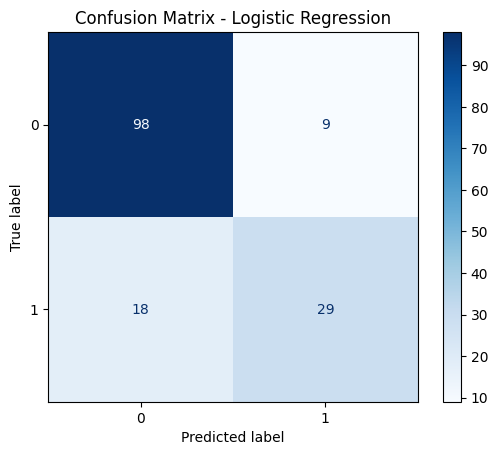

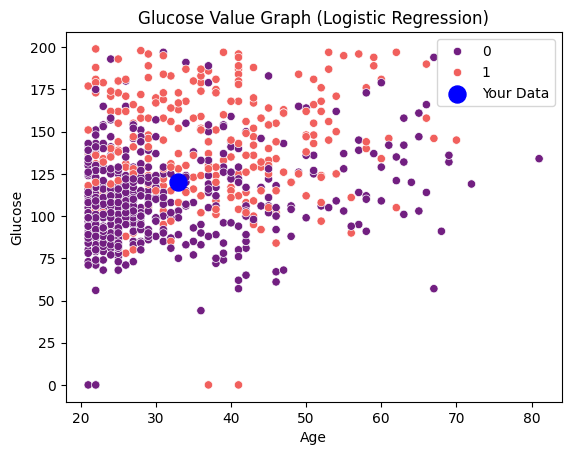

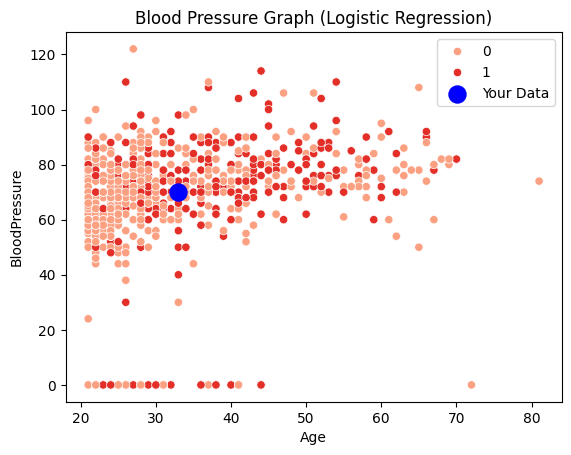

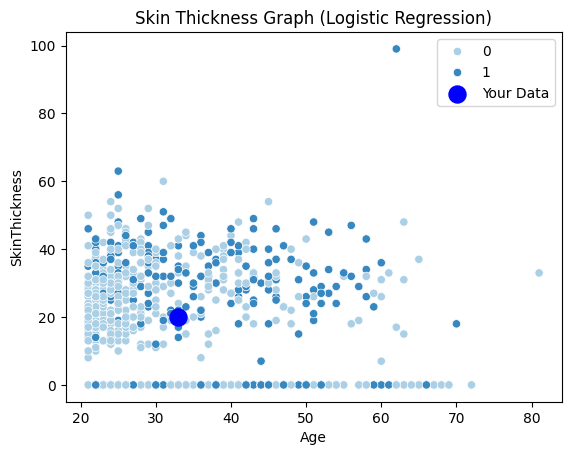

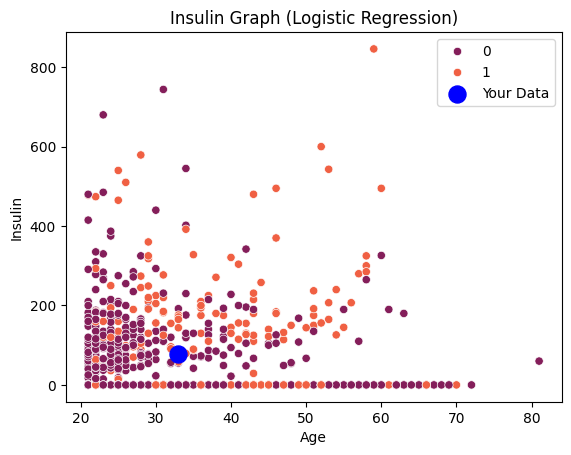

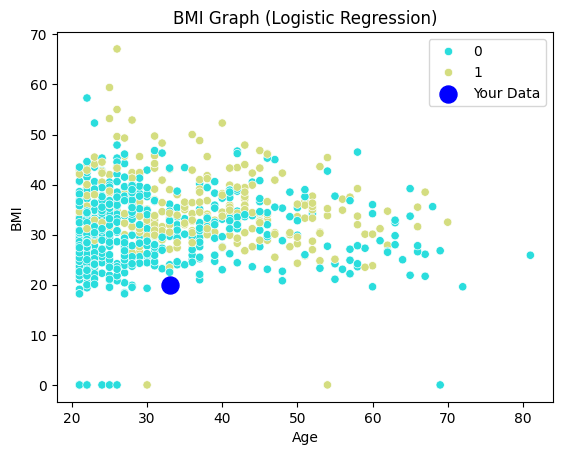

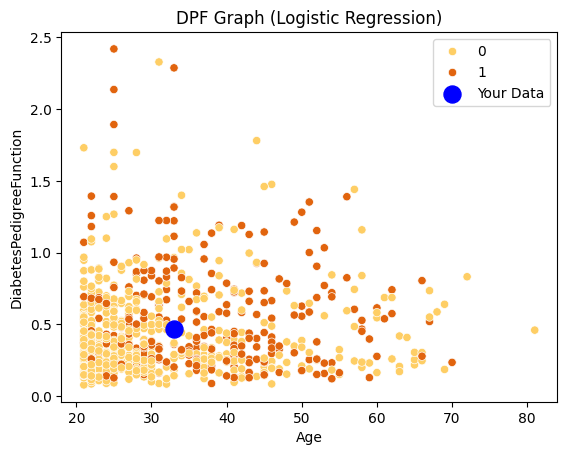

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

lr = LogisticRegression(random_state=0)
lr.fit(x_train, y_train)
user_result_lr = lr.predict(user_report_data)


lr_output = 'You are not Diabetic' if user_result_lr[0] == 0 else 'You are Diabetic'
print(f"Logistic Regression Report: {lr_output}")


lr_accuracy = accuracy_score(y_test, lr.predict(x_test)) * 100
print(f"Logistic Regression Accuracy: {lr_accuracy:.2f}%")

cm_lr = confusion_matrix(y_test, lr.predict(x_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr)
disp_lr.plot(cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Visualize Patient Data vs Dataset
create_scatter_plot('Age', 'Glucose', user_report_data['Age'][0], user_report_data['Glucose'][0], 'magma', 'Glucose Value Graph (Logistic Regression)')
create_scatter_plot('Age', 'BloodPressure', user_report_data['Age'][0], user_report_data['BloodPressure'][0], 'Reds', 'Blood Pressure Graph (Logistic Regression)')
create_scatter_plot('Age', 'SkinThickness', user_report_data['Age'][0], user_report_data['SkinThickness'][0], 'Blues', 'Skin Thickness Graph (Logistic Regression)')
create_scatter_plot('Age', 'Insulin', user_report_data['Age'][0], user_report_data['Insulin'][0], 'rocket', 'Insulin Graph (Logistic Regression)')
create_scatter_plot('Age', 'BMI', user_report_data['Age'][0], user_report_data['BMI'][0], 'rainbow', 'BMI Graph (Logistic Regression)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_report_data['Age'][0], user_report_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (Logistic Regression)')


#SVM
Non-Linear Decision Boundaries: Useful for capturing complex relationships between features, such as interactions between glucose and BMI.

High-Dimensional Spaces: SVM performs well even when the data isn't linearly separable, thanks to its kernel trick.

Outlier Resistance: Robust to outliers, making it reliable even with extreme feature values.



SVM Report: You are not Diabetic
SVM Accuracy: 79.22%


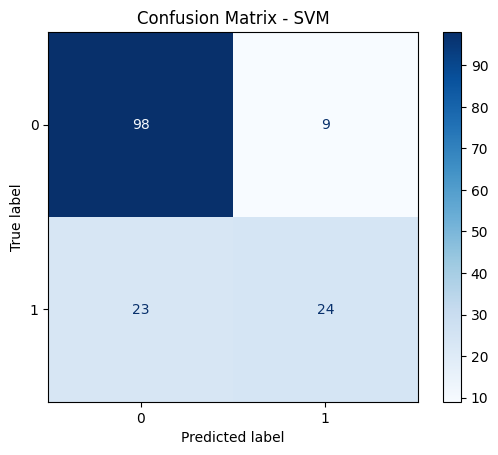

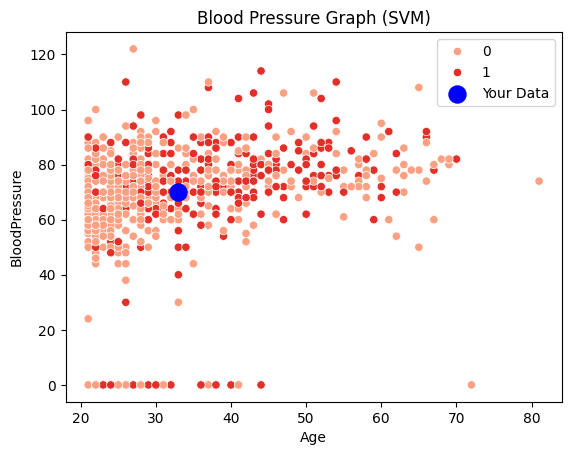

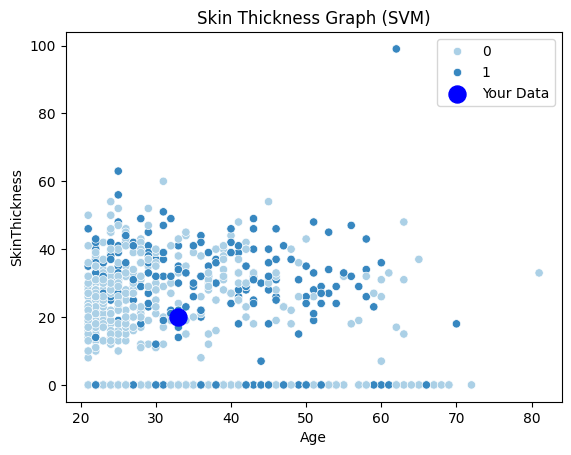

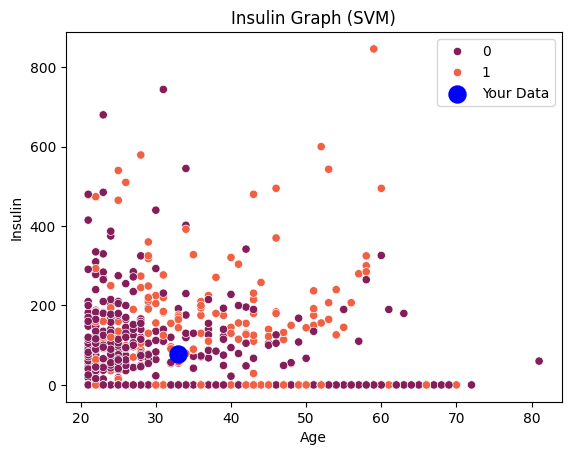

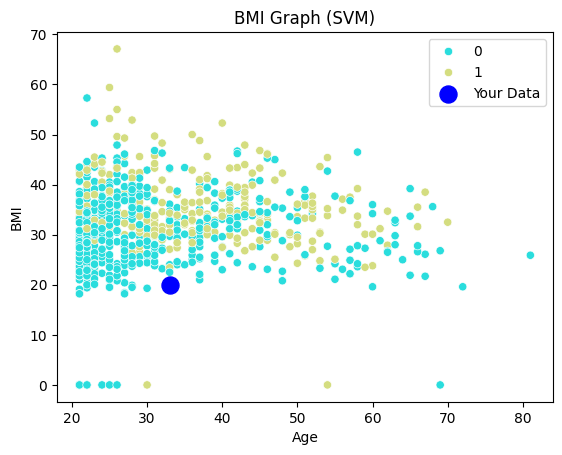

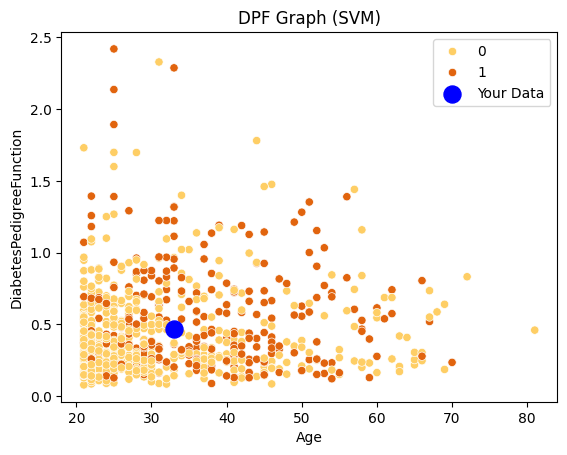

In [13]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

svm = SVC(random_state=0)
svm.fit(x_train, y_train)
user_result_svm = svm.predict(user_report_data)

svm_output = 'You are not Diabetic' if user_result_svm[0] == 0 else 'You are Diabetic'
print(f"SVM Report: {svm_output}")

svm_accuracy = accuracy_score(y_test, svm.predict(x_test)) * 100
print(f"SVM Accuracy: {svm_accuracy:.2f}%")

cm_svm = confusion_matrix(y_test, svm.predict(x_test))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm)
disp_svm.plot(cmap='Blues')
plt.title("Confusion Matrix - SVM")
plt.show()


create_scatter_plot('Age', 'BloodPressure', user_report_data['Age'][0], user_report_data['BloodPressure'][0], 'Reds', 'Blood Pressure Graph (SVM)')
create_scatter_plot('Age', 'SkinThickness', user_report_data['Age'][0], user_report_data['SkinThickness'][0], 'Blues', 'Skin Thickness Graph (SVM)')
create_scatter_plot('Age', 'Insulin', user_report_data['Age'][0], user_report_data['Insulin'][0], 'rocket', 'Insulin Graph (SVM)')
create_scatter_plot('Age', 'BMI', user_report_data['Age'][0], user_report_data['BMI'][0], 'rainbow', 'BMI Graph (SVM)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_report_data['Age'][0], user_report_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (SVM)')


## KNN
Non-Parametric: Makes no assumptions about data distribution, useful for unknown feature relationships.

Locality-Based: Classifies based on proximity, which is effective when similar individuals (in terms of features) have the same outcome.

Simplicity: Easy to implement and quick to use without explicit training.

KNN Report: You are not Diabetic
KNN Accuracy: 75.32%


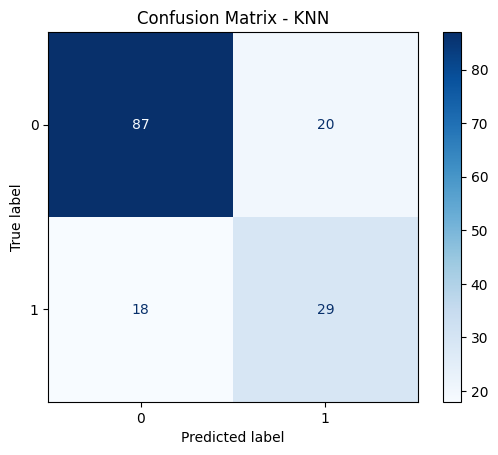

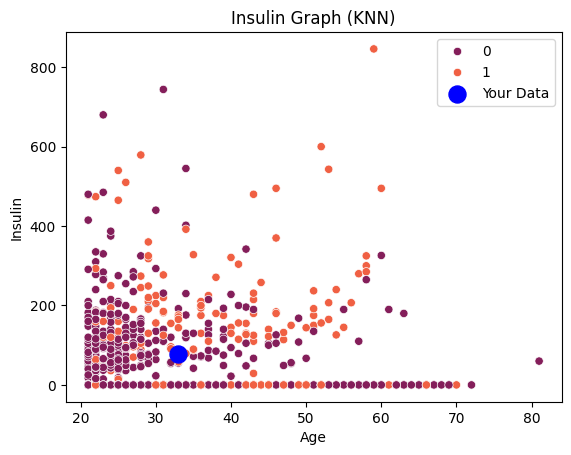

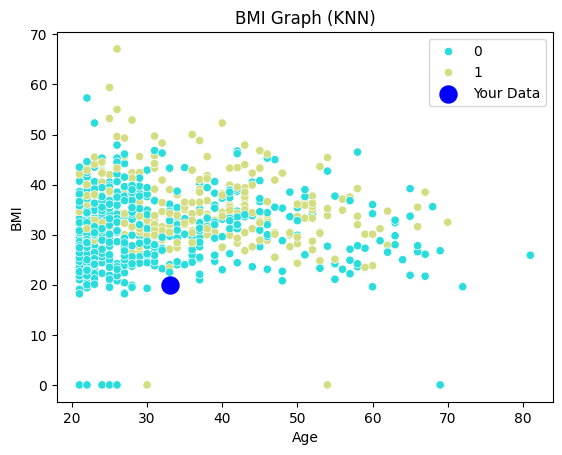

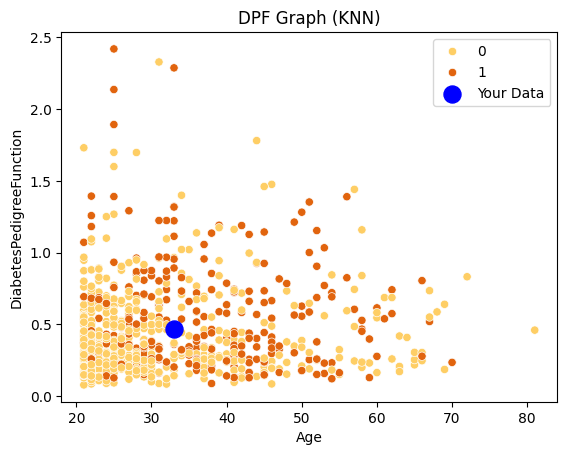

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
user_result_knn = knn.predict(user_report_data)


knn_output = 'You are not Diabetic' if user_result_knn[0] == 0 else 'You are Diabetic'
print(f"KNN Report: {knn_output}")


knn_accuracy = accuracy_score(y_test, knn.predict(x_test)) * 100
print(f"KNN Accuracy: {knn_accuracy:.2f}%")


cm_knn = confusion_matrix(y_test, knn.predict(x_test))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN")
plt.show()


create_scatter_plot('Age', 'Insulin', user_report_data['Age'][0], user_report_data['Insulin'][0], 'rocket', 'Insulin Graph (KNN)')
create_scatter_plot('Age', 'BMI', user_report_data['Age'][0], user_report_data['BMI'][0], 'rainbow', 'BMI Graph (KNN)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_report_data['Age'][0], user_report_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (KNN)')


### GRADIENT BOOSTING

Captures Complex Interactions: Builds multiple decision trees sequentially, improving accuracy by modeling non-linear feature interactions.

High Accuracy: Boosting improves performance by correcting errors from earlier trees, making it highly accurate.

Robustness: Works well with noisy data and complex patterns, often outperforming other models.



Gradient Boosting Report: You are not Diabetic
Gradient Boosting Accuracy: 80.52%


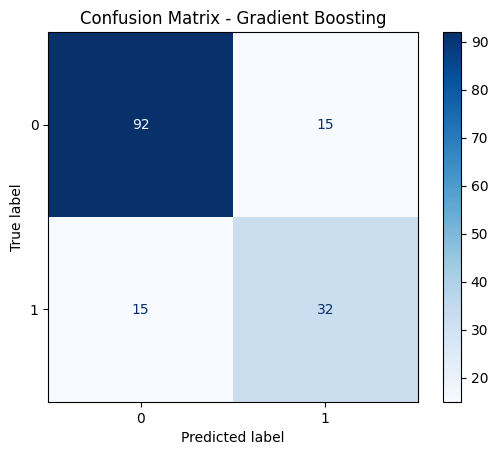

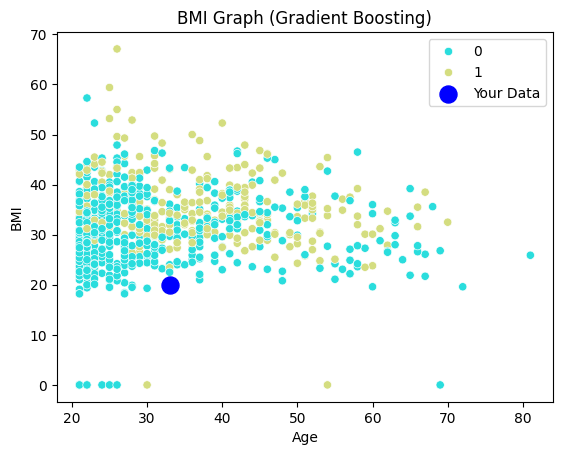

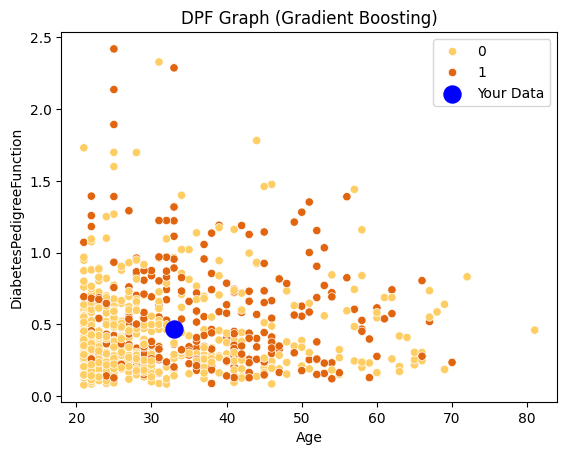

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

gb = GradientBoostingClassifier(random_state=0)
gb.fit(x_train, y_train)
user_result_gb = gb.predict(user_report_data)


gb_output = 'You are not Diabetic' if user_result_gb[0] == 0 else 'You are Diabetic'
print(f"Gradient Boosting Report: {gb_output}")


gb_accuracy = accuracy_score(y_test, gb.predict(x_test)) * 100
print(f"Gradient Boosting Accuracy: {gb_accuracy:.2f}%")


cm_gb = confusion_matrix(y_test, gb.predict(x_test))
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb)
disp_gb.plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


create_scatter_plot('Age', 'BMI', user_report_data['Age'][0], user_report_data['BMI'][0], 'rainbow', 'BMI Graph (Gradient Boosting)')
create_scatter_plot('Age', 'DiabetesPedigreeFunction', user_report_data['Age'][0], user_report_data['DiabetesPedigreeFunction'][0], 'YlOrBr', 'DPF Graph (Gradient Boosting)')
